## Síntese de compensadores de avanço e atraso de fase pelo método do lugar das raízes



In [1]:
# !pip install matplotlib ipympl jupyter

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib widget

import numpy as np
import control as ct

s = ct.tf([1, 0], [1])

In [3]:
# Paleta de cores
cp = {
    'red': (1.0, 0.349, 0.369, 1.0),
    'green': (0.541, 0.788, 0.149, 1.0),
    'blue': (0.098, 0.510, 0.769, 1.0),
    'lred': (1.0, 0.588, 0.6, 1.0),
    'lgreen': (0.722, 0.894, 0.443, 1.0),
    'lblue': (0.369, 0.706, 0.918, 1.0),
    'orange': (1.0, 0.506, 0.227, 1.0),
    'yellow': (1.0, 0.792, 0.227, 1.0),
    'pink': (1.0, 0.349, 0.611, 1.0),
    'purple': (0.416, 0.298, 0.576, 1.0),
    'turquoise': (0.098, 0.761, 0.769, 1.0),
    'brown': (0.576, 0.380, 0.298, 1.0)
}

### 1. Compensador de avanço de fase

Um *compensador de avanço de fase* tem uma função de transferência da forma:
$$ G_c(s) = \frac{1 + Ts}{1 + \alpha Ts} = \frac{1}{\alpha} \frac{s + \frac{1}{T}}{s + \frac{1}{\alpha T}} = \frac{1}{\alpha} \frac{s - z_c}{s - p_c}
\quad \text{com} \quad
0 < \alpha <1
$$

Tal compensador adiciona ao sistema um polo, em $\displaystyle s = p_c = -\frac{1}{\alpha T}$ e um zero em $\displaystyle s = z_c = -\frac{1}{T}$, com $p_c < z_c$, sem alterar o valor de $\displaystyle K_m = \lim_{s \to 0} s^m L(s)$ do sistema.

Observando sua *resposta em frequência*, nota-se que o *avanço de fase* ocorre em todo o espectro de frequência, tendo seu valor máximo dado por:
$$ \phi_m = \arcsin\left(\frac{1-\alpha}{1+\alpha} \right)
\quad \text{em} \quad
\omega_m T = \frac{1}{\sqrt{\alpha}} 
$$
Em termos de *ganho*, este tipo de compensador tem características de um filtro *passa-altas*: 
* não há praticamente nenhum aumento no ganho para $\omega T \ll 1$;
* o ganho é amplificado em $\displaystyle +10 \ |\log_{10} \alpha| \ \text{dB}$ para $\displaystyle \omega_m T = \frac{1}{\sqrt{\alpha}} $;
* o ganho é amplificado em $\displaystyle +20 \ |\log_{10} \alpha| \ \text{dB}$ para $\displaystyle \omega T \gg \frac{1}{\alpha}$.



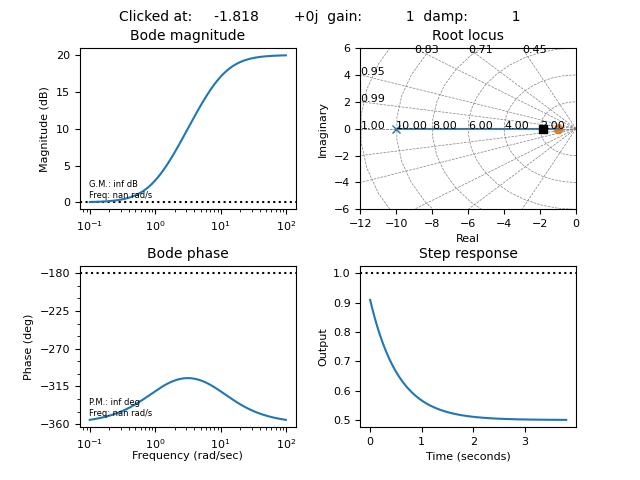

In [4]:
plt.ion()  # ativar o modo interativo
ct.sisotool((1+s)/(1 + 0.1*s), xlim_rlocus=(-12, 0), ylim_rlocus=(-6, 6),
            rlocus_grid=True, dB=True)
plt.draw()  # desenhar a janela interativa

#### 1.1. Síntese de um compensador de avanço de fase

Consideremos novamente a função de transferência de malha aberta *do exemplo A-6-19 do livro* 
> OGATA, K. (2001) Modern Control Engineering, 4th ed., Pearson.

que modela *piloto automático para o modo longitudinal (pitch) de um avião*:

\begin{align*}
    L(s) = G(s)H(s) = \frac{K(s+a)}{s(s-b)(s^2 + 2\zeta \omega_n s + \omega_n^2)} = K \frac{N(s)}{D(s)}
\end{align*}
com:
\begin{align*}
    & N(s) = (s+a) \\
    & D(s) = s(s-b)(s^2 + 2\zeta \omega_n s + \omega_n^2)
\end{align*}

Adote-se $a=b=1$, $\zeta=0.5$ e $\omega_n=4$:

\begin{align*}
   L(s) = \frac{K(s+1)}{s(s-1)(s^2 + 4s + 16)}
\end{align*}

Neste caso, o sistema é do tipo 1, tendo um zero em $z_1 = -1$ e quatro polos em $p_0=0$ (multiplicidade algébrica 1), $p_1=+1$ e $p_{2,3}=-2 \pm 2\sqrt{3} \mathsf{j}$.



In [5]:
zeros = np.array([-1])
poles = np.array([0, +1, -2 + (2j * np.sqrt(3)), -2 - (2j * np.sqrt(3))])

N = ct.tf(np.poly(zeros), [1])
D = ct.tf(np.poly(poles), [1])

L_0 = N/D
L_0

TransferFunction(array([1., 1.]), array([  1.,   3.,  12., -16.,   0.]))

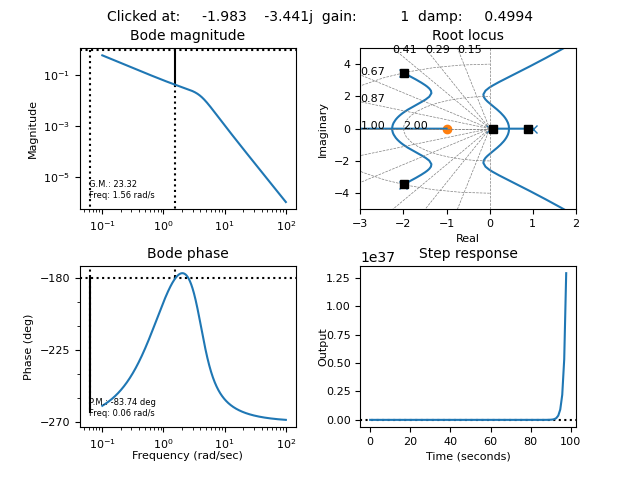

In [6]:
plt.ion()  # ativar o modo interativo
ct.sisotool(L_0, xlim_rlocus=(-3, 2), ylim_rlocus=(-5, 5),
            rlocus_grid=True)
plt.draw()  # desenhar a janela interativa

Vamos tentar projetar um compensador de avanço de fase que leve os polos dominantes do sistema em malha fechada para a posição $\bar p_{1,2} = -0.4 \pm 1 \ \mathsf{j}$ 

In [7]:
clp_1 = -0.4+1j
(np.abs(clp_1), -np.real(clp_1)/np.abs(clp_1)) # valores de (ω_n, ζ)

(1.0770329614269007, 0.3713906763541038)

Usando a função de transferência do sistema não compensado $\displaystyle L_0(s) = \frac{N(s)}{D(s)}$ verifica-se que, para o polo $\bar p_1 = -0.4 + 1 \ \mathsf{j}$ o valor de $\phase{L_0(p_1)}$ é igual a:

In [8]:
φ_L_clp1 = np.angle(L_0(clp_1)) 
φ_L_clp1 * 180/np.pi  # exibe o resultado em graus

149.49431586213967

Ou seja, para que o polo desejado faça parte do lugar das raízes, é necessário um avanço de fase $\varphi$:

In [9]:
φ = np.pi - φ_L_clp1
φ * 180/np.pi   # exibe o resultado em graus

30.505684137860317

Uma regra prática para a alocação do zero $z_c$ e do polo $p_c$ do compensador que maximiza o valor de $\alpha$ (ou seja, maximiza o ganho em alta frequência) consiste em adotar:

\begin{align*}
& z_c = \text{Re}(\bar p_1) - \frac{\text{Im}(\bar p_1)}{\displaystyle \tan \left(\frac{\bar \psi_1 + \varphi}{2} \right)}
\\
& p_c = \text{Re}(\bar p_1) - \frac{\text{Im}(\bar p_1)}{\displaystyle \tan \left(\frac{\bar \psi_1 - \varphi}{2} \right)}
\end{align*}

com $\bar \psi_1= \phase{\bar p_1}$.

In [10]:
z_c = np.real(clp_1) - np.imag(clp_1)/np.tan(0.5 * (np.angle(clp_1) + φ))
z_c

-0.7413327395776523

In [11]:
p_c = np.real(clp_1) - np.imag(clp_1)/np.tan(0.5 * (np.angle(clp_1) - φ))
p_c

-1.5647494546927314

Assim, os valores de $T$ e $\alpha$ podem ser calculados como:
$$
T = - \frac{1}{z_c} \quad \text{e} \quad \alpha = \frac{z_c}{p_c}
$$

In [12]:
α = z_c/p_c
(- 1/z_c, α)

(1.3489219437006303, 0.47377088859457517)

A nova função de transferência de malha aberta, com o compensador de avanço projetado, é dada por:
$$
L_1(s) = K_c  \underbrace{\frac{1}{\alpha} \frac{(s - z_c)}{(s - p_c)}}_{\text{avanço}} \frac{N(s)}{D(s)}
$$

O ganho $K_c$ para que $\bar p_{1,2}$ sejam efetivamente polos em malha fechada pode então ser calculado a partir da condição $L_1(\bar p_1) = -1$, ou seja:

$$
\frac{K_c}{\alpha} \left| \frac{(\bar p_1-z_c)}{(\bar p_1-p_c)} \frac{N(\bar p_1)}{D(\bar p_1)} \right| = 1
\quad \Rightarrow \quad 
K_c = \alpha \left| \frac{(\bar p_1-p_c)}{(\bar p_1-z_c)} \frac{D(\bar p_1)}{N(\bar p_1)} \right|
$$

In [13]:
L_1_1 = 1/α * (s - z_c)/(s - p_c) * N/D
L_1_1

TransferFunction(array([2.11072488, 3.67547433, 1.56474945]), array([  1.        ,   4.56474945,  16.69424836,   2.77699346,
       -25.03599128,   0.        ]))

In [14]:
L_1_1(clp_1)

(-0.06562698253742492+3.423918520448505e-17j)

In [15]:
K_c = 1/np.abs(L_1_1(clp_1))
K_c

15.237634907710905

Assim, temos o seguinte compensador de avanço:

In [16]:
G_lead = K_c/α * (s - z_c)/(s - p_c)
G_lead

TransferFunction(array([32.16245505, 23.84308091]), array([1.        , 1.56474945]))

Diagrama de Bode do compensador sintetizado:

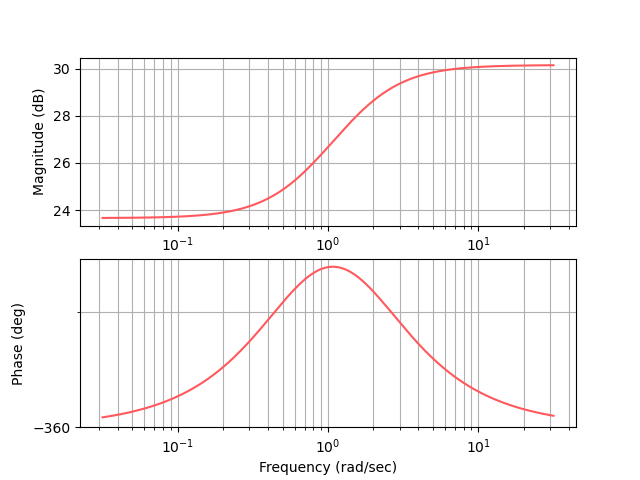

In [21]:
plt.figure()
G_lead_M, G_lead_φ, G_lead_ω = ct.bode_plot(G_lead,
                                   omega=np.logspace(-1.5, 1.5, 5001),
                                   color=cp['red'],
                                   dB=True)

Análise da função de transferência em malha aberta do sistema com compensador:

In [18]:
L_1 = G_lead * L_0
L_1

TransferFunction(array([32.16245505, 56.00553596, 23.84308091]), array([  1.        ,   4.56474945,  16.69424836,   2.77699346,
       -25.03599128,   0.        ]))

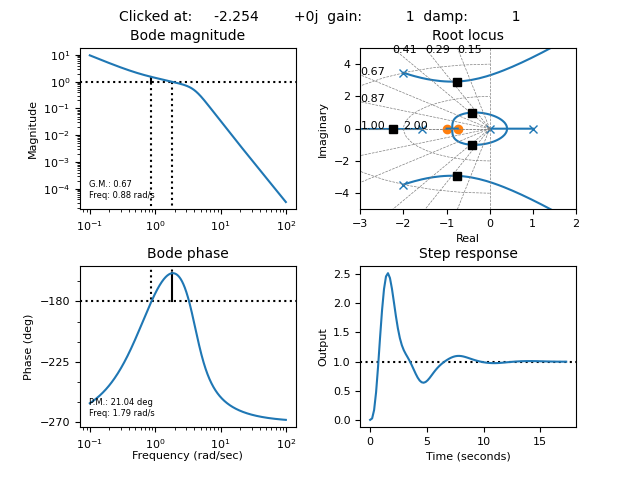

In [19]:
plt.ion()  # ativar o modo interativo
ct.sisotool(L_1, xlim_rlocus=(-3, 2), ylim_rlocus=(-5, 5),
            rlocus_grid=True)
plt.draw()  # desenhar a janela interativa

#### 1.2. Função de transferência entre referência (r) e saída (c)

In [23]:
rc_tf_lead = ct.feedback(G_lead * L_0)
rc_tf_lead

TransferFunction(array([32.16245505, 56.00553596, 23.84308091]), array([ 1.        ,  4.56474945, 16.69424836, 34.9394485 , 30.96954469,
       23.84308091]))

Frequencias naturais, fatores de amortecimento e zeros em malha fechada:

In [24]:
ω_n_cl, ζ_cl, zeros_cl = rc_tf_lead.damp()
ω_n_cl

array([3.01952093, 3.01952093, 2.25438609, 1.07703296, 1.07703296])

In [25]:
ζ_cl

array([0.25009983, 0.25009983, 1.        , 0.37139068, 0.37139068])

In [26]:
zeros_cl

array([-0.75518168+2.92356072j, -0.75518168-2.92356072j,
       -2.25438609+0.j        , -0.4       +1.j        ,
       -0.4       -1.j        ])

Diagrama de Bode da função de transferência do sistema em malha fechada:

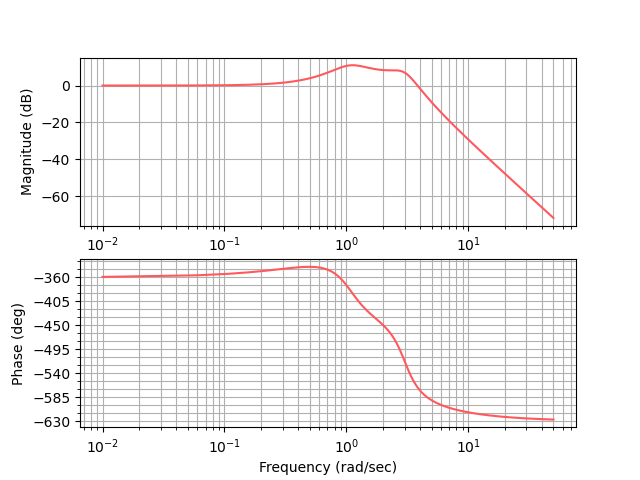

In [27]:
plt.figure()
rc_tf_M, rc_tf_φ, rc_tf_ω = ct.bode_plot(rc_tf_lead,
                                   omega=np.linspace(0.01, 50, 1001),
                                   color=cp['red'],
                                   dB=True)

#### 1.3. Função de transferência entre referência (r) e entrada de controle (u)

In [28]:
ru_tf_lead = ct.feedback(G_lead, L_0)
ru_tf_lead

TransferFunction(array([  32.16245505,  120.33044606,  457.47870332, -228.48230982,
       -381.4892946 ,    0.        ]), array([ 1.        ,  4.56474945, 16.69424836, 34.9394485 , 30.96954469,
       23.84308091]))

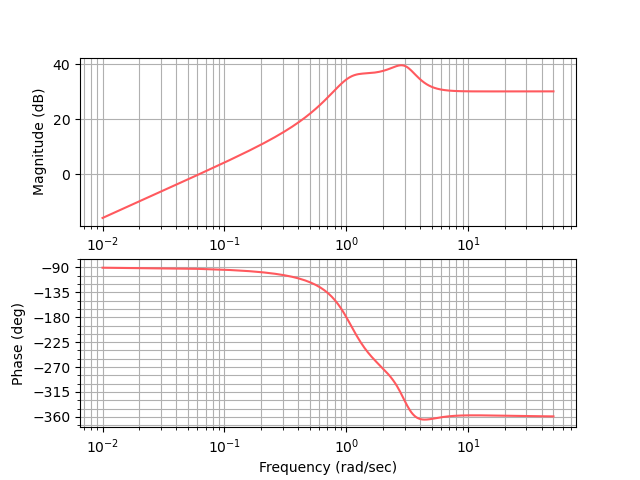

In [29]:
plt.figure()
ru_tf_M, ru_tf_φ, ru_tf_ω = ct.bode_plot(ru_tf_lead,
                                         omega=np.linspace(0.01, 50, 1001),
                                         color=cp['red'],
                                         dB=True)

#### 1.4. Resposta a degrau

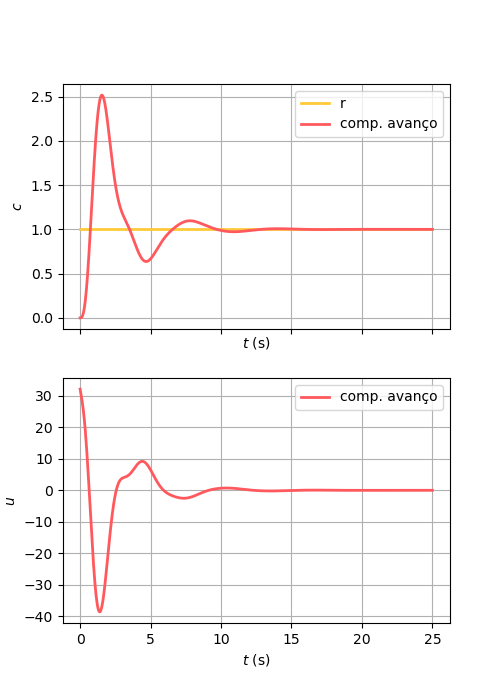

In [30]:
# simulação do sistema em MF
ts = np.linspace(0, 25, 1000)

t, y = ct.step_response(rc_tf_lead, ts)
t, u = ct.step_response(ru_tf_lead, ts)

fig, (state, control_input) = plt.subplots(
    2, 1, figsize=(5, 7), sharex=True)

state.plot(t, np.ones(len(t)), color=cp['yellow'], label='r', linewidth=2)
state.plot(t, y,
           color=cp['red'], label=r'comp. avanço', linewidth=2)
state.set_ylabel(r'$c$')
state.set_xlabel(r'$t$ (s)')
state.legend()
state.grid()

control_input.plot(t, u,
           color=cp['red'], label=r'comp. avanço', linewidth=2)
control_input.set_ylabel(r'$u$')
control_input.set_xlabel(r'$t$ (s)')
control_input.legend()
control_input.grid()

#### 1.5. Resposta a rampa

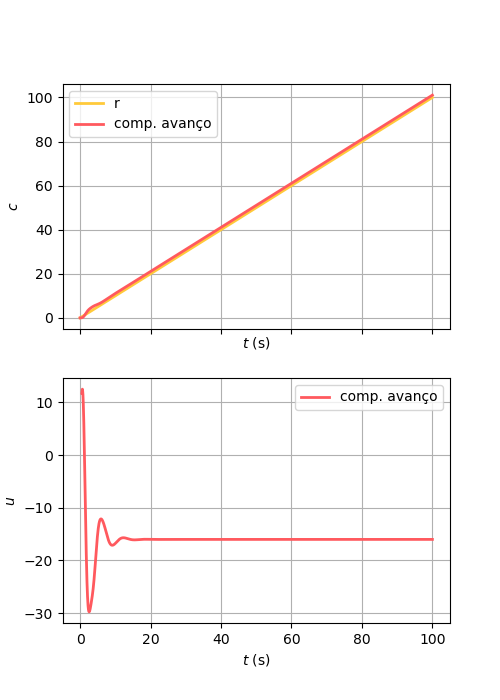

In [52]:
# simulação do sistema em MF
ts = np.linspace(0, 100, 2000)

t, y = ct.forced_response(rc_tf_lead, ts, U=ts)
t, u = ct.forced_response(ru_tf_lead, ts, U=ts)

fig, (state, control_input) = plt.subplots(
    2, 1, figsize=(5, 7), sharex=True)

state.plot(t, t, color=cp['yellow'], label='r', linewidth=2)
# state.plot(t, y_PI, color=cp['green'], label='PI', linewidth=2)
state.plot(t, y, color=cp['red'], label='comp. avanço', linewidth=2)
state.set_ylabel(r'$c$')
state.set_xlabel(r'$t$ (s)')
state.legend()
state.grid()


control_input.plot(t[10:], u[10:], color=cp['red'],
                   label='comp. avanço', linewidth=2)
control_input.set_ylabel(r'$u$')
control_input.set_xlabel(r'$t$ (s)')
control_input.legend()
control_input.grid()

Dado que o sistema compensado é do tipo 1, o erro em regime ao seguir uma referência do tipo rampa unitária é dado por:
$$
e_{ss} = \frac{1}{K_1}
\quad \text{com} \quad
K_1 = \lim_{s \to 0} s L(s) 
$$

In [32]:
L_1 = G_lead * L_0
L_1

TransferFunction(array([32.16245505, 56.00553596, 23.84308091]), array([  1.        ,   4.56474945,  16.69424836,   2.77699346,
       -25.03599128,   0.        ]))

In [33]:
K1_1 = L_1.num[0][0][-1]/L_1.den[0][0][-2]
K1_1

-0.9523521817319317

In [34]:
e_ss_1 = 1/K1_1
e_ss_1

-1.0500317205987986

### 2. Compensador de atraso de fase

Um *compensador de atraso de fase* tem uma função de transferência da forma:
$$ G_g(s) = \frac{1 + Ts}{1 + \beta Ts} = \frac{1}{\beta} \frac{s + \frac{1}{T}}{s + \frac{1}{\alpha T}} = \frac{1}{\beta} \frac{s - z_g}{s - p_g}
\quad \text{com} \quad
\beta >1
$$

Tal compensador adiciona ao sistema um polo, em $\displaystyle s = p_g = -\frac{1}{\beta T}$ e um zero em $\displaystyle s = z_g = -\frac{1}{T}$, com $z_g < p_g$, sem alterar o valor de $\displaystyle K_m = \lim_{s \to 0} s^m L(s)$ do sistema.

Observando sua *resposta em frequência*, nota-se que o *atraso de fase* ocorre em todo o espectro de frequência. Em termos de *ganho*, este tipo de compensador tem características de um filtro *passa-baixas*: 
* não há praticamente nenhuma redução no ganho para $\displaystyle \omega T \ll \frac{1}{\beta}$;
* o ganho é atenuado em $\displaystyle -20 \ |\log_{10} \beta| \ \text{dB}$ para $\omega T \gg 1$.

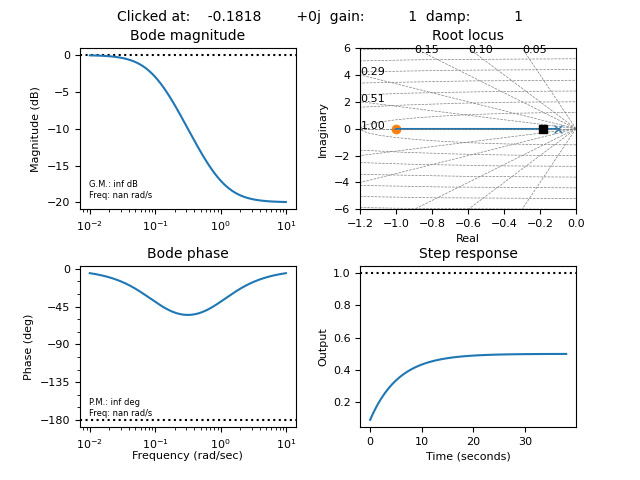

In [53]:
plt.ion()  # ativar o modo interativo
ct.sisotool((1+s)/(1 + 10*s), xlim_rlocus=(-1.2, 0), ylim_rlocus=(-6, 6),
            rlocus_grid=True, dB=True)
plt.draw()  # desenhar a janela interativa

O atraso de fase em si não é um efeito desejável (veremos adiante que *atrasos podem ser prejudiciais à estabilidade* do sistema em malha fechada). 

No entanto, a presença deste tipo de compensador torna possível aumentar o ganho $K_m$ do sistema (*reduzindo erros de acompanhamento de referência*) sem afetar de forma significativa a resposta do sistema em alta frequência. 

A configuração tipicamente escolhida para o *compensador de atraso* é um *dipolo*, ou seja, escolhem-se $z_g$ e $p_g$ com $\displaystyle \frac{z_g}{p_g} = \beta$ tais que, sendo $\bar p$ um *polo dominante* do sistema em malha fechada:
$$
\left| \bar p - z_g \right| \approx \left| \bar p - p_g \right|
\quad \Rightarrow \quad 
|G_c(\bar p)| \approx \frac{1}{\beta}
$$

Desta forma, ao inserirmos na malha de controle um compensador de atraso, podemos amplificar $K_m$ em $\beta$ vezes, reduzindo erros de acompanhamento de referência e mantendo praticamente inalterada a resposta do sistema em alta frequência. 

#### 2.1. Síntese de um compensador de atraso

Voltando ao exemplo anterior, vamos avaliar como reduzir em 10 vezes o erro de acompanhamento do sistema. 

Partimos da função de transferência em malha aberta já com o compensador de avanço:
$$
L_1 (s) = K_c \underbrace{\frac{1}{\alpha} \frac{(s - z_c)}{(s - p_c)}}_{\text{avanço}} \frac{N(s)}{D(s)}
$$
e a modificamos para a forma:
$$
L_2 (s) = \overbrace{\beta K_c}^{\text{ganho}} \underbrace{\frac{1}{\beta} \frac{(s - z_g)}{(s - p_g)}}_{\text{atraso}} \underbrace{\frac{1}{\alpha} \frac{(s - z_c)}{(s - p_c)}}_{\text{avanço}} \frac{N(s)}{D(s)}
$$

Considere as posições dos polos dominantes em malha fechada:

/tmp/ipykernel_20254/3811511722.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


(array([-0.75518168+2.92356072j, -0.75518168-2.92356072j,
        -2.25438609+0.j        , -0.4       +1.j        ,
        -0.4       -1.j        ]),
 array([-1.        +0.j, -0.74133274+0.j]))

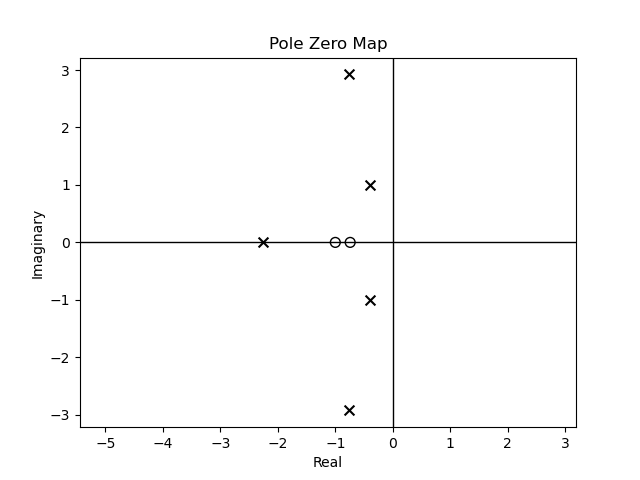

In [70]:
plt.figure()
ct.pzmap(rc_tf_lead)

Assim, escolhemos o *dipolo* com:

In [55]:
z_g = -0.1
p_g = -0.01
β = z_g/p_g
β

10.0

E obtemos a nova função de transferência em malha aberta:

In [56]:
L_2 = L_1 * (s - z_g)/(s - p_g)
L_2

TransferFunction(array([32.16245505, 59.22178147, 29.44363451,  2.38430809]), array([  1.        ,   4.57474945,  16.73989586,   2.94393594,
       -25.00822134,  -0.25035991,   0.        ]))

Para a qual obtemos o novo valor de $K_1$ para $L_2$ ($\beta = 10$ vezes superior ao obtido para $L_1$):

In [57]:
K1_2 = L_2.num[0][0][-1]/L_2.den[0][0][-2]
K1_2

-9.523521817319317

Lugar das raízes da função de transferência $L_2(s)$:

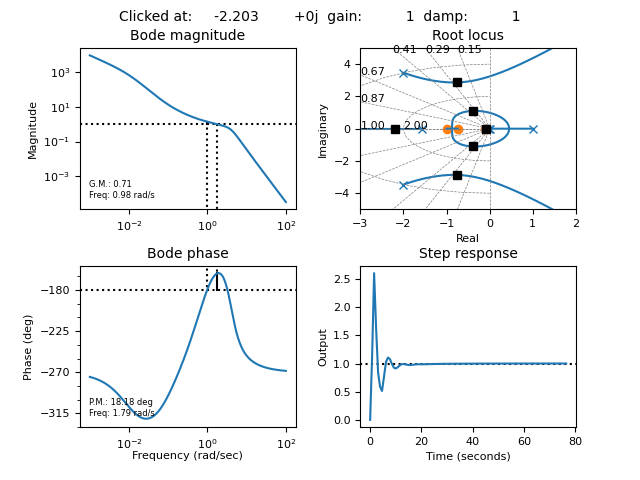

In [58]:
plt.ion()  # ativar o modo interativo
ct.sisotool(L_2, xlim_rlocus=(-3, 2), ylim_rlocus=(-5, 5),
            rlocus_grid=True)
plt.draw()  # desenhar a janela interativa

O compensador completo pode ser descrito como:

In [59]:
G_ll = G_lead * (s - z_g)/(s - p_g)
G_ll

TransferFunction(array([32.16245505, 27.05932642,  2.38430809]), array([1.        , 1.57474945, 0.01564749]))

Diagrama de Bode do compensador completo:

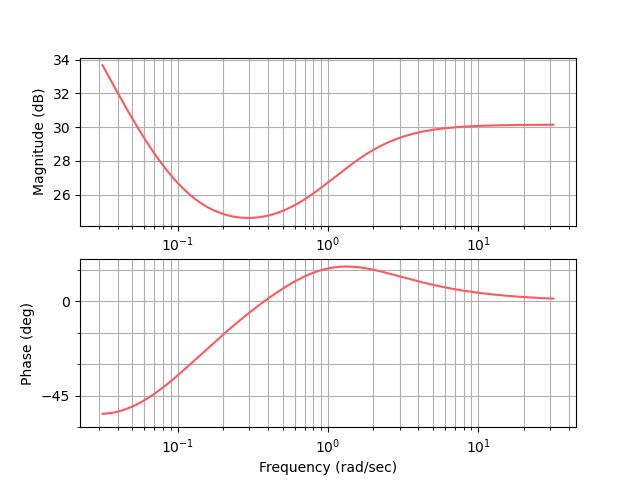

In [60]:
plt.figure()
G_ll_M, G_ll_φ, G_ll_ω = ct.bode_plot(G_ll,
                                      omega=np.logspace(-1.5, 1.5, 5001),
                                      color=cp['red'],
                                      dB=True)

#### 2.2. Função de transferência entre referência (r) e saída (c)

In [61]:
rc_tf_ll = ct.feedback(G_ll * L_0)
rc_tf_ll

TransferFunction(array([32.16245505, 59.22178147, 29.44363451,  2.38430809]), array([ 1.        ,  4.57474945, 16.73989586, 35.10639099, 34.21356013,
       29.1932746 ,  2.38430809]))

Frequencias naturais, fatores de amortecimento e zeros em malha fechada:

In [62]:
ω_n_cl, ζ_cl, zeros_cl = rc_tf_ll.damp()
ω_n_cl

array([2.96571279, 2.96571279, 2.20308654, 1.16668356, 1.16668356,
       0.09039959])

In [63]:
ζ_cl

array([0.25737051, 0.25737051, 1.        , 0.32343358, 0.32343358,
       1.        ])

In [64]:
zeros_cl

array([-0.76328702+2.86580621j, -0.76328702-2.86580621j,
       -2.20308654+0.j        , -0.37734465+1.10397534j,
       -0.37734465-1.10397534j, -0.09039959+0.j        ])

Diagrama de Bode da função de transferência do sistema em malha fechada:

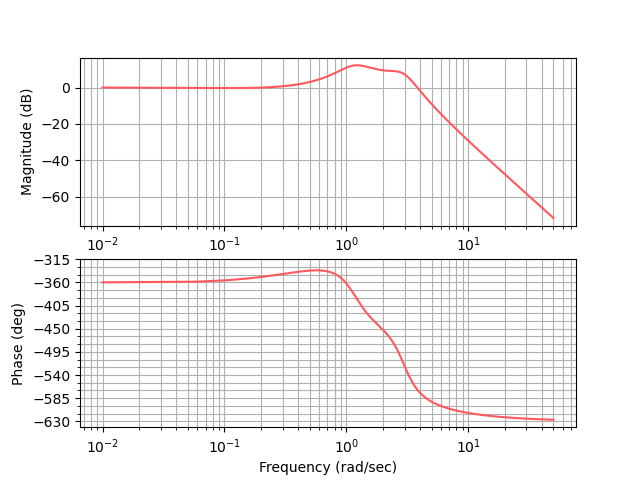

In [65]:
plt.figure()
rc_tf_M, rc_tf_φ, rc_tf_ω = ct.bode_plot(rc_tf_ll,
                                   omega=np.linspace(0.01, 50, 1001),
                                   color=cp['red'],
                                   dB=True)

#### 2.3. Função de transferência entre referência (r) e entrada de controle (u)

In [66]:
ru_tf_ll = ct.feedback(G_ll, L_0)
ru_tf_ll

TransferFunction(array([  32.16245505,  123.54669156,  469.51174793, -182.73443949,
       -404.33752558,  -38.14892946,    0.        ]), array([ 1.        ,  4.57474945, 16.73989586, 35.10639099, 34.21356013,
       29.1932746 ,  2.38430809]))

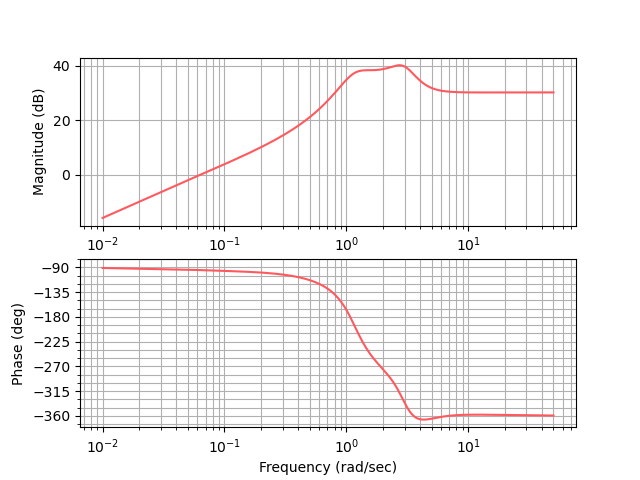

In [67]:
plt.figure()
ru_tf_M, ru_tf_φ, ru_tf_ω = ct.bode_plot(ru_tf_ll,
                                         omega=np.linspace(0.01, 50, 1001),
                                         color=cp['red'],
                                         dB=True)

#### 2.4. Resposta a degrau

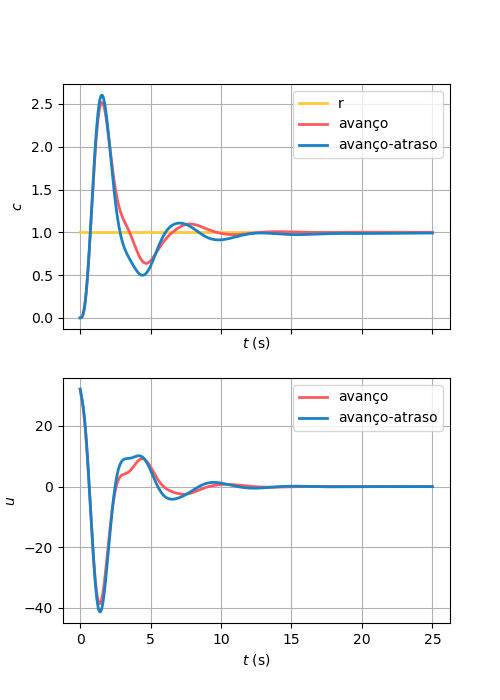

In [68]:
# simulação do sistema em MF
ts = np.linspace(0, 25, 1000)

t, y_l = ct.step_response(rc_tf_lead, ts)
t, u_l = ct.step_response(ru_tf_lead, ts)

t, y_ll = ct.step_response(rc_tf_ll, ts)
t, u_ll = ct.step_response(ru_tf_ll, ts)

fig, (state, control_input) = plt.subplots(
    2, 1, figsize=(5, 7), sharex=True)

state.plot(t, np.ones(len(t)), color=cp['yellow'], label='r', linewidth=2)
state.plot(t, y_l,
           color=cp['red'], label=r'avanço', linewidth=2)
state.plot(t, y_ll,
           color=cp['blue'], label=r'avanço-atraso', linewidth=2)
state.set_ylabel(r'$c$')
state.set_xlabel(r'$t$ (s)')
state.legend()
state.grid()

control_input.plot(t, u_l,
           color=cp['red'], label=r'avanço', linewidth=2)
control_input.plot(t, u_ll,
                   color=cp['blue'], label=r'avanço-atraso', linewidth=2)
control_input.set_ylabel(r'$u$')
control_input.set_xlabel(r'$t$ (s)')
control_input.legend()
control_input.grid()

#### 1.5. Resposta a rampa

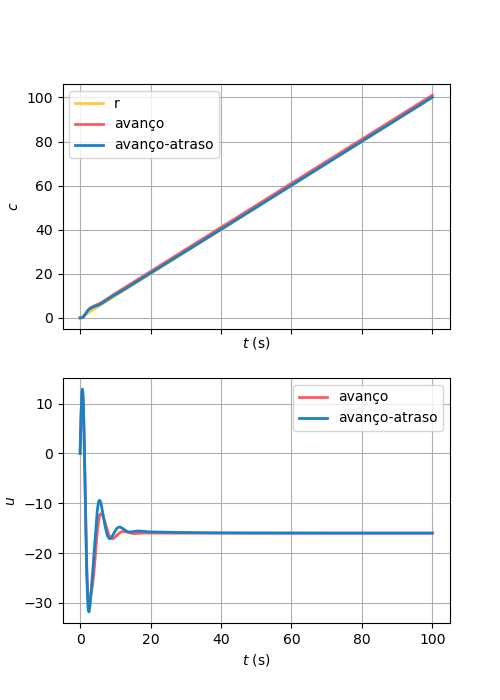

In [69]:
# simulação do sistema em MF
ts = np.linspace(0, 100, 2000)

t, y_l = ct.forced_response(rc_tf_lead, ts, U=ts)
t, u_l = ct.forced_response(ru_tf_lead, ts, U=ts)

t, y_ll = ct.forced_response(rc_tf_ll, ts, U=ts)
t, u_ll = ct.forced_response(ru_tf_ll, ts, U=ts)

fig, (state, control_input) = plt.subplots(
    2, 1, figsize=(5, 7), sharex=True)

state.plot(t, t, color=cp['yellow'], label='r', linewidth=2)
state.plot(t, y_l,
           color=cp['red'], label=r'avanço', linewidth=2)
state.plot(t, y_ll,
           color=cp['blue'], label=r'avanço-atraso', linewidth=2)
state.set_ylabel(r'$c$')
state.set_xlabel(r'$t$ (s)')
state.legend()
state.grid()

control_input.plot(t, u_l,
                   color=cp['red'], label=r'avanço', linewidth=2)
control_input.plot(t, u_ll,
                   color=cp['blue'], label=r'avanço-atraso', linewidth=2)
control_input.set_ylabel(r'$u$')
control_input.set_xlabel(r'$t$ (s)')
control_input.legend()
control_input.grid()